In [76]:
import numpy as np
import matplotlib.pyplot as plt

- 5次スプラインを解くための行列A,bを返す
- data : (n, 2)
- A : (6(n-1), 6(n-1))

In [77]:
def make_spline5_array(data, continuous = False):
    n = data.shape[0]
    A = np.zeros((6*(n-1), 6*(n-1)))
    b = np.zeros(6*(n-1))
    row = 0

    for i in range(1,n-1):
        x, y = data[i]

        # 0次微分
        A[row, 6*(i-1) + 0] = x ** 5
        A[row, 6*(i-1) + 1] = x ** 4
        A[row, 6*(i-1) + 2] = x ** 3
        A[row, 6*(i-1) + 3] = x ** 2
        A[row, 6*(i-1) + 4] = x ** 1
        A[row, 6*(i-1) + 5] = 1
        b[row] = y
        row += 1
        
        A[row, 6*i + 0] = x ** 5
        A[row, 6*i + 1] = x ** 4
        A[row, 6*i + 2] = x ** 3
        A[row, 6*i + 3] = x ** 2
        A[row, 6*i + 4] = x ** 1
        A[row, 6*i + 5] = 1
        b[row] = y
        row += 1

        # 1次微分
        A[row, 6*(i-1) + 0] = 5 * (x ** 4)
        A[row, 6*(i-1) + 1] = 4 * (x ** 3)
        A[row, 6*(i-1) + 2] = 3 * (x ** 2)
        A[row, 6*(i-1) + 3] = 2 * (x ** 1)
        A[row, 6*(i-1) + 4] = 1
        A[row, 6*i + 0] = -5 * (x ** 4)
        A[row, 6*i + 1] = -4 * (x ** 3)
        A[row, 6*i + 2] = -3 * (x ** 2)
        A[row, 6*i + 3] = -2 * (x ** 1)
        A[row, 6*i + 4] = -1
        b[row] = 0
        row += 1
        
        # 2次微分
        A[row, 6*(i-1) + 0] = 20 * (x ** 3)
        A[row, 6*(i-1) + 1] = 12 * (x ** 2)
        A[row, 6*(i-1) + 2] = 6 * (x ** 1)
        A[row, 6*(i-1) + 3] = 2
        A[row, 6*i + 0] = -20 * (x ** 3)
        A[row, 6*i + 1] = -12 * (x ** 2)
        A[row, 6*i + 2] = -6 * (x ** 1)
        A[row, 6*i + 3] = -2
        b[row] = 0
        row += 1
        
        # 3次微分
        A[row, 6*(i-1) + 0] = 60 * (x ** 2)
        A[row, 6*(i-1) + 1] = 24 * (x ** 1)
        A[row, 6*(i-1) + 2] = 6
        A[row, 6*i + 0] = -60 * (x ** 2)
        A[row, 6*i + 1] = -24 * (x ** 1)
        A[row, 6*i + 2] = -6
        b[row] = 0
        row += 1
        
        # 4次微分
        A[row, 6*(i-1) + 0] = 120 * (x ** 1)
        A[row, 6*(i-1) + 1] = 24
        A[row, 6*i + 0] = -120 * (x ** 1)
        A[row, 6*i + 1] = -24
        b[row] = 0
        row += 1
        
    # 境界条件
    if not continuous:
        x, y = data[0]
        # 0次微分
        A[row, 0] = x ** 5
        A[row, 1] = x ** 4
        A[row, 2] = x ** 3
        A[row, 3] = x ** 2
        A[row, 4] = x ** 1
        A[row, 5] = 1
        b[row] = y
        row += 1

        # 1次微分
        A[row, 0] = 5 * (x ** 4)
        A[row, 1] = 4 * (x ** 3)
        A[row, 2] = 3 * (x ** 2)
        A[row, 3] = 2 * (x ** 1)
        A[row, 4] = 1
        b[row] = 0
        row += 1

        # 2次微分
        A[row, 0] = 20 * (x ** 3)
        A[row, 1] = 12 * (x ** 2)
        A[row, 2] = 6 * (x ** 1)
        A[row, 3] = 2
        b[row] = 0
        row += 1

        x, y = data[-1]
        # 0次微分
        A[row, 6*(n-2) + 0] = x ** 5
        A[row, 6*(n-2) + 1] = x ** 4
        A[row, 6*(n-2) + 2] = x ** 3
        A[row, 6*(n-2) + 3] = x ** 2
        A[row, 6*(n-2) + 4] = x ** 1
        A[row, 6*(n-2) + 5] = 1
        b[row] = y
        row += 1

        # 1次微分
        A[row, 6*(n-2) + 0] = 5 * (x ** 4)
        A[row, 6*(n-2) + 1] = 4 * (x ** 3)
        A[row, 6*(n-2) + 2] = 3 * (x ** 2)
        A[row, 6*(n-2) + 3] = 2 * (x ** 1)
        A[row, 6*(n-2) + 4] = 1
        b[row] = 0
        row += 1

        # 2次微分
        A[row, 6*(n-2) + 0] = 20 * (x ** 3)
        A[row, 6*(n-2) + 1] = 12 * (x ** 2)
        A[row, 6*(n-2) + 2] = 6 * (x ** 1)
        A[row, 6*(n-2) + 3] = 2
        b[row] = 0
        row += 1      
    else:
        xs, ys = data[0]
        xe, ye = data[-1]
        
        # 0次微分
        A[row, 0] = xs ** 5
        A[row, 1] = xs ** 4
        A[row, 2] = xs ** 3
        A[row, 3] = xs ** 2
        A[row, 4] = xs ** 1
        A[row, 5] = 1
        b[row] = ys
        row += 1
        A[row, 6*(n-2) + 0] = xe ** 5
        A[row, 6*(n-2) + 1] = xe ** 4
        A[row, 6*(n-2) + 2] = xe ** 3
        A[row, 6*(n-2) + 3] = xe ** 2
        A[row, 6*(n-2) + 4] = xe ** 1
        A[row, 6*(n-2) + 5] = 1
        b[row] = ye
        row += 1

        # 1次微分
        A[row, 0] = 5 * (xs ** 4)
        A[row, 1] = 4 * (xs ** 3)
        A[row, 2] = 3 * (xs ** 2)
        A[row, 3] = 2 * (xs ** 1)
        A[row, 4] = 1
        A[row, 6*(n-2) + 0] = -5 * (xe ** 4)
        A[row, 6*(n-2) + 1] = -4 * (xe ** 3)
        A[row, 6*(n-2) + 2] = -3 * (xe ** 2)
        A[row, 6*(n-2) + 3] = -2 * (xe ** 1)
        A[row, 6*(n-2) + 4] = -1 
        b[row] = 0
        row += 1

        # 2次微分
        A[row, 0] = 20 * (xs ** 3)
        A[row, 1] = 12 * (xs ** 2)
        A[row, 2] = 6 * (xs ** 1)
        A[row, 3] = 2
        A[row, 6*(n-2) + 0] = -20 * (xe ** 3)
        A[row, 6*(n-2) + 1] = -12 * (xe ** 2)
        A[row, 6*(n-2) + 2] = -6 * (xe ** 1)
        A[row, 6*(n-2) + 3] = -2
        b[row] = 0
        row += 1
        
        # 3次微分
        A[row, 0] = 60 * (xs ** 2)
        A[row, 1] = 24 * (xs ** 1)
        A[row, 2] = 6
        A[row, 6*(n-2) + 0] = -60 * (xe ** 2)
        A[row, 6*(n-2) + 1] = -24 * (xe ** 1)
        A[row, 6*(n-2) + 2] = -6
        b[row] = 0
        row += 1
        
        # 4次微分
        A[row, 0] = 120 * (xs ** 1)
        A[row, 1] = 24
        A[row, 6*(n-2) + 0] = -120 * (xe ** 1)
        A[row, 6*(n-2) + 1] = -24
        b[row] = 0
        row += 1

    return A,b

In [97]:
data = np.array([[1,1],
                 [2,2],
                 [3,8]])
A,b = make_spline5_array(data, continuous=False)
coeffs = np.linalg.solve(A,b)

In [117]:
def calc_5_poly_0(x, a):
    return a[0]*(x**5) + a[1]*(x**4) + a[2]*(x**3) + a[3]*(x**2) +a[4]*(x**1) + a[5]
def calc_5_poly_1(x, a):
    return 5 * a[0]*(x**4) +  4 * a[1]*(x**3) + 3*a[2]*(x**2) + 2*a[3]*(x**1) +a[4]
def calc_5_poly_2(x, a):
    return 20 *a[0]*(x**3) + 12*a[1]*(x**2) + 6*a[2]*(x**1) + 2*a[3]
def calc_5_poly_3(x, a):
    return 60*a[0]*(x**2) + 24*a[1]*(x**1) + 6*a[2]
def calc_5_poly_4(x, a):
    return 120*a[0]*(x**1) + 24*a[1]
    
def plot(coeffs, points, resolution):
    data_0 = []
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    start_x = points[0,0]
    end_x = points[-1,0]
    delta_x = (end_x - start_x) / (resolution - 1)
    x = start_x
    func_idx = 0
    for i in range(resolution):
        a = coeffs[6*func_idx:6*(func_idx+1)]
        y = calc_5_poly_0(x,a)
        data_0.append([x,y])
        y = calc_5_poly_1(x,a)
        data_1.append([x,y])
        y = calc_5_poly_2(x,a)
        data_2.append([x,y])
        y = calc_5_poly_3(x,a)
        data_3.append([x,y])
        y = calc_5_poly_4(x,a)
        data_4.append([x,y])
        x += delta_x
        if (x >= points[func_idx+1,0]):
            func_idx += 1
    data_0 = np.array(data_0)
    data_1 = np.array(data_1)
    data_2 = np.array(data_2)
    data_3 = np.array(data_3)
    data_4 = np.array(data_4)
    plt.plot(data_0[:,0], data_0[:,1])
    plt.scatter(points[:,0], points[:,1])
    plt.show()
    plt.plot(data_1[:,0], data_1[:,1])
    plt.show()
    plt.plot(data_2[:,0], data_2[:,1])
    plt.show()
    plt.plot(data_3[:,0], data_3[:,1])
    plt.show()
    plt.plot(data_4[:,0], data_4[:,1])
    plt.show()
    
    return data_0
    

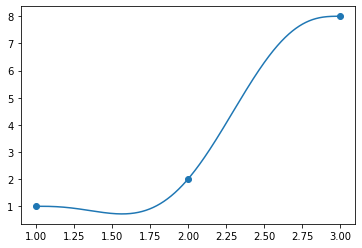

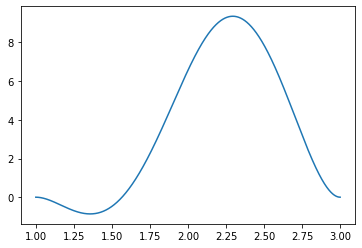

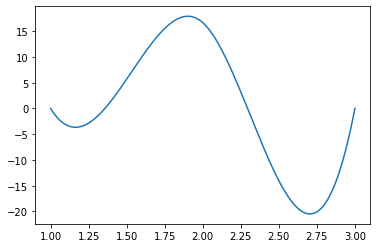

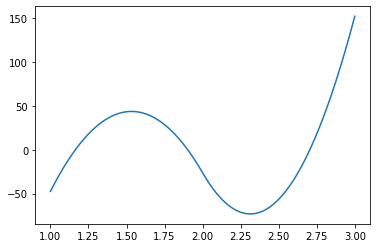

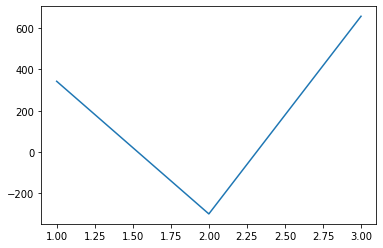

In [118]:
plot_data = plot(coeffs, data, 100000)